In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from python.nominal import associations
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df=pd.read_csv(r"/content/chronickidneydisease.csv")
df

id   age    bp     sg   al   su     rbc        pc         pcc  \
0      0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent   
1      1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent   
2      2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent   
3      3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present   
4      4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent   
..   ...   ...   ...    ...  ...  ...     ...       ...         ...   
395  395  55.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
396  396  42.0  70.0  1.025  0.0  0.0  normal    normal  notpresent   
397  397  12.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
398  398  17.0  60.0  1.025  0.0  0.0  normal    normal  notpresent   
399  399  58.0  80.0  1.025  0.0  0.0  normal    normal  notpresent   

             ba  ...  pcv    wc   rc  htn   dm  cad appet   pe  ane  \
0    notpresent  ...   44  7800  5.2  yes  yes   no  good   no   no   
1    notpresent  ...   38  6000  NaN   no   no   no  good   no   no   
2    notpresent  ...   31  7500  NaN   no  yes   no  poor   no  yes   
3    notpresent  ...   32  6700  3.9  yes   no   no  poor  yes  yes   
4    notpresent  ...   35  7300  4.6   no   no   no  good   no   no   
..          ...  ...  ...   ...  ...  ...  ...  ...   ...  ...  ...   
395  notpresent  ...   47  6700  4.9   no   no   no  good   no   no   
396  notpresent  ...   54  7800  6.2   no   no   no  good   no   no   
397  notpresent  ...   49  6600  5.4   no   no   no  good   no   no   
398  notpresent  ...   51  7200  5.9   no   no   no  good   no   no   
399  notpresent  ...   53  6800  6.1   no   no   no  good   no   no   

    classification  
0              ckd  
1              ckd  
2              ckd  
3              ckd  
4              ckd  
..             ...  
395         notckd  
396         notckd  
397         notckd  
398         notckd  
399         notckd  

[400 rows x 26 columns]

## EXPLORATORY DATA ANALYSIS

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [ ]:
def convert_dtype(df,feature):
    df[feature]=pd.to_numeric(df[feature],errors='coerce')    #whereever we have Nan values , this errors parameter will hanfle that 


In [ ]:
features=['pcv','wc','rc']
for i in features:
    convert_dtype(df,i)

CHECKING THE CKD AND NN CKD

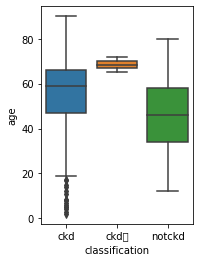

In [ ]:
plt.subplot(1,2,1)
sns.boxplot(x=df['classification'],y=df['age'])

In [ ]:
def extract_cat_num(kidney):
    cat_col=[col for col in kidney.columns if kidney[col].dtype=='O']
    num_col=[col for col in kidney.columns if kidney[col].dtype!='O']
    return cat_col,num_col

In [ ]:
cat_col,num_col=extract_cat_num(df)


## Analysing distribution of each and every column

In [ ]:
len(num_col)

15

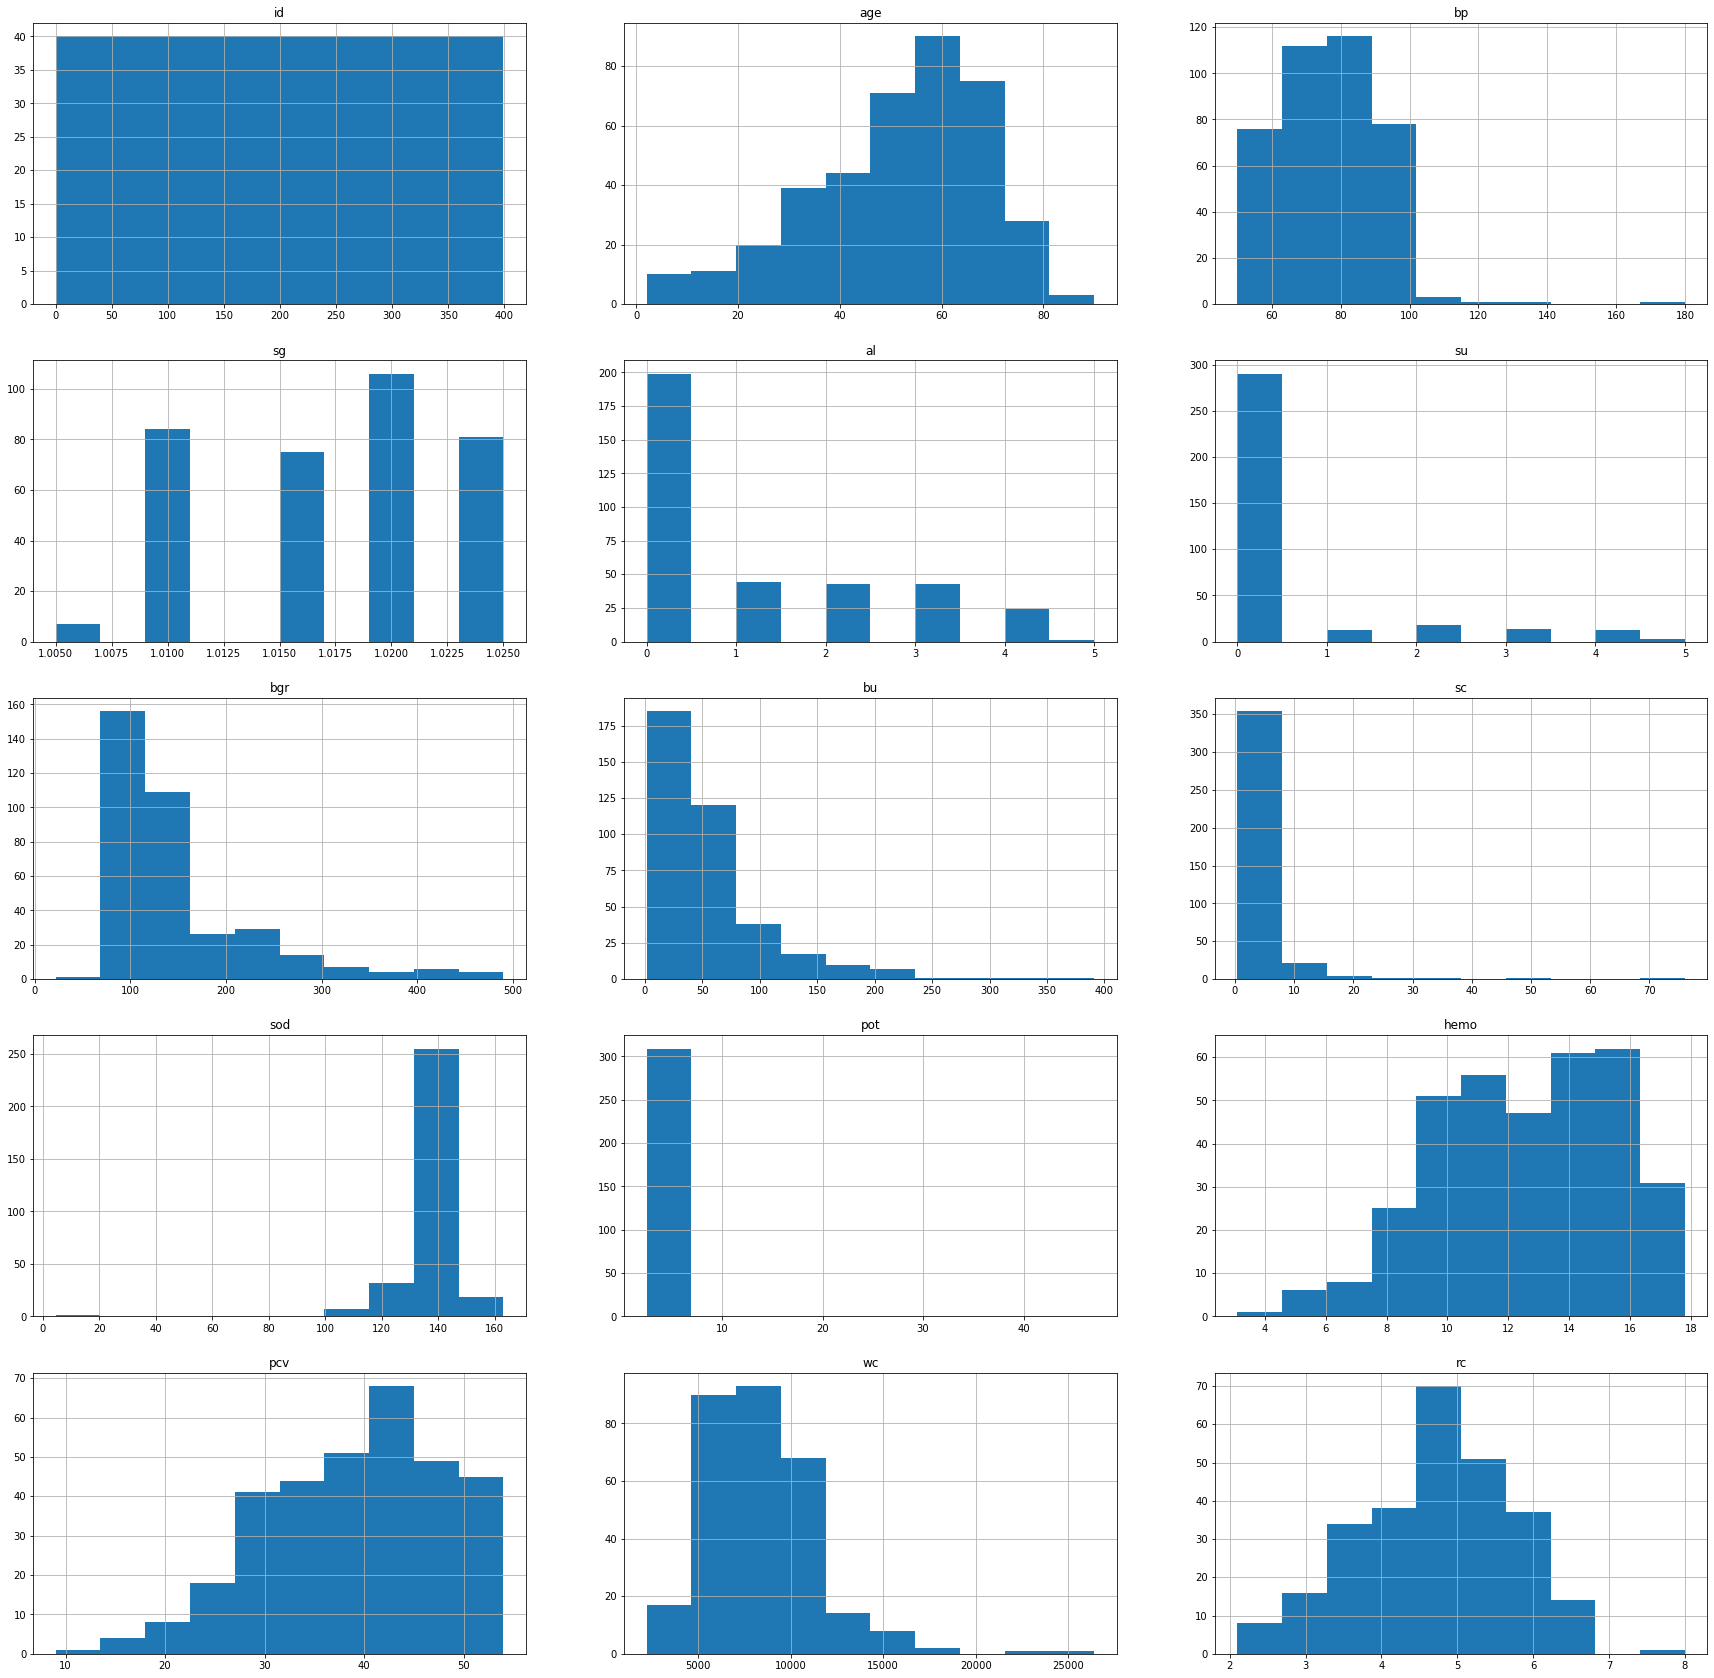

In [ ]:
plt.figure(figsize=(30,30))
for i,feature in enumerate(num_col):
    plt.subplot(5,3,i+1)      
    df[feature].hist()
    plt.title(feature)

# Check  distribution of categorical Data


In [ ]:
len(cat_col)

11

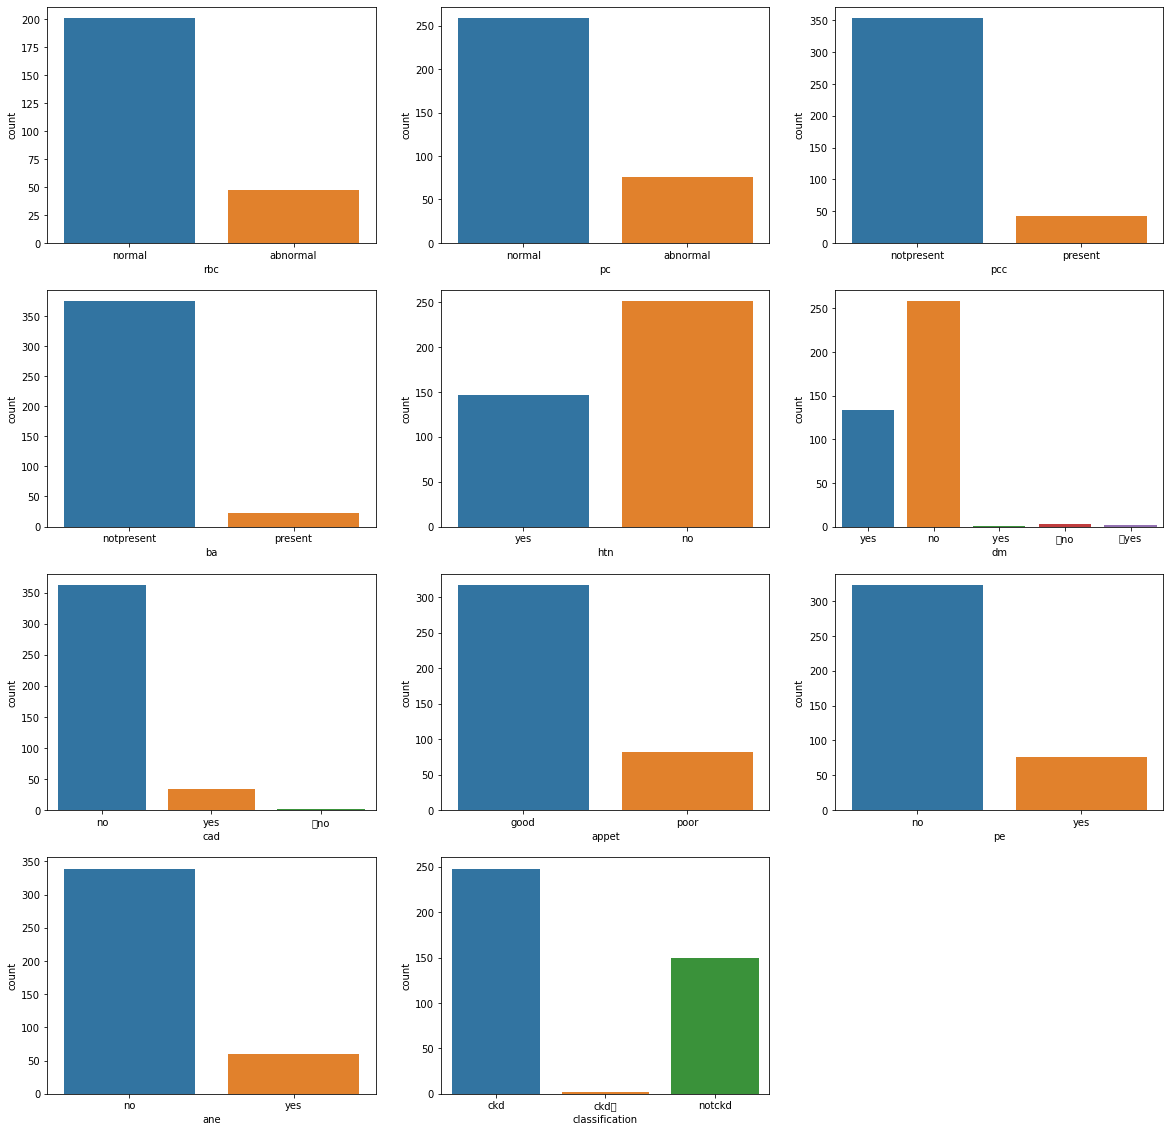

In [ ]:
plt.figure(figsize=(20,20))

for i,feature in enumerate(cat_col):
    plt.subplot(4,3,i+1)
    sns.countplot(df[feature])

In [ ]:
df.groupby(['rbc','classification'])['rc'].agg(['count','mean','median','min','max'])


count      mean  median  min  max
rbc      classification                                   
abnormal ckd                25  3.832000     3.7  2.5  5.6
normal   ckd                40  3.782500     3.8  2.1  8.0
         ckd\t               0       NaN     NaN  NaN  NaN
         notckd            134  5.368657     5.3  4.4  6.5

## Relationship between haemoglobin and packed cell volume


Text(0.5, 1.0, 'Relationship between haemoglobin and packed cell volume')

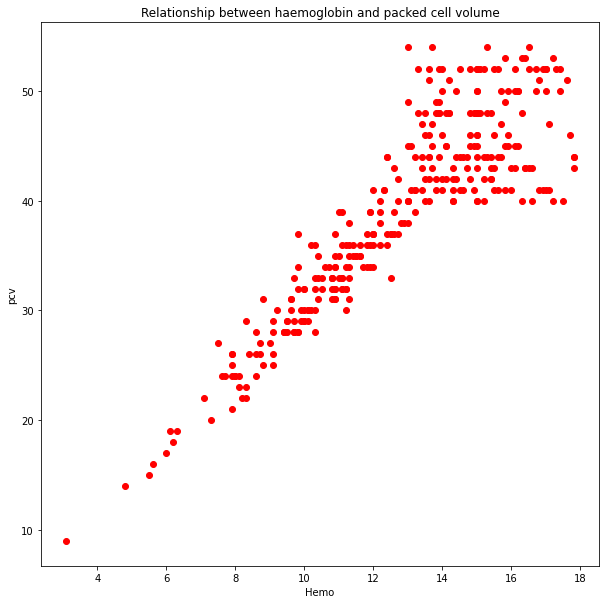

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(x=df.hemo,y=df['pcv'],color="red")
plt.xlabel('Hemo')
plt.ylabel('pcv')
plt.title('Relationship between haemoglobin and packed cell volume')

## Analyse distribution of red blood cell count chronic as well as non chronic


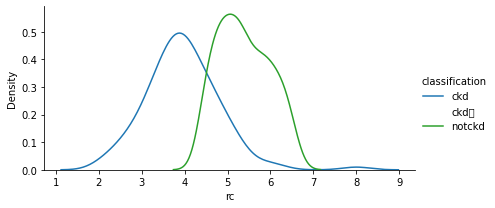

In [ ]:
grid=sns.FacetGrid(df,hue='classification',aspect=2)
grid.map(sns.kdeplot,'rc')
grid.add_legend()

Text(0.5, 1.0, 'Relationship between haemoglobin and red blood cell count')

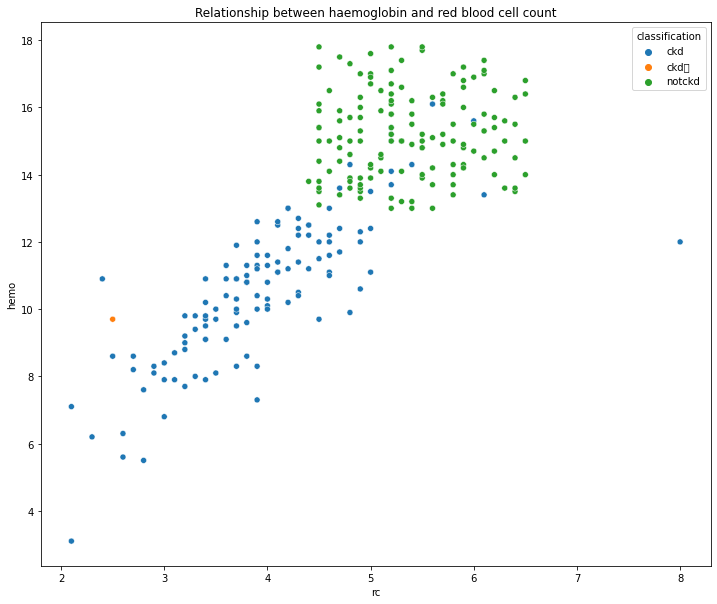

In [ ]:
plt.figure(figsize=(12,10))
sns.scatterplot(x=df['rc'],y=df['hemo'],hue=df['classification'])
plt.xlabel('rc')
plt.ylabel('hemo')
plt.title('Relationship between haemoglobin and red blood cell count')

## CORRELATION

In [ ]:
from dython.nominal import identify_nominal_columns
categorical_features=identify_nominal_columns(df)
categorical_features

['rbc',
 'pc',
 'pcc',
 'ba',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'classification']

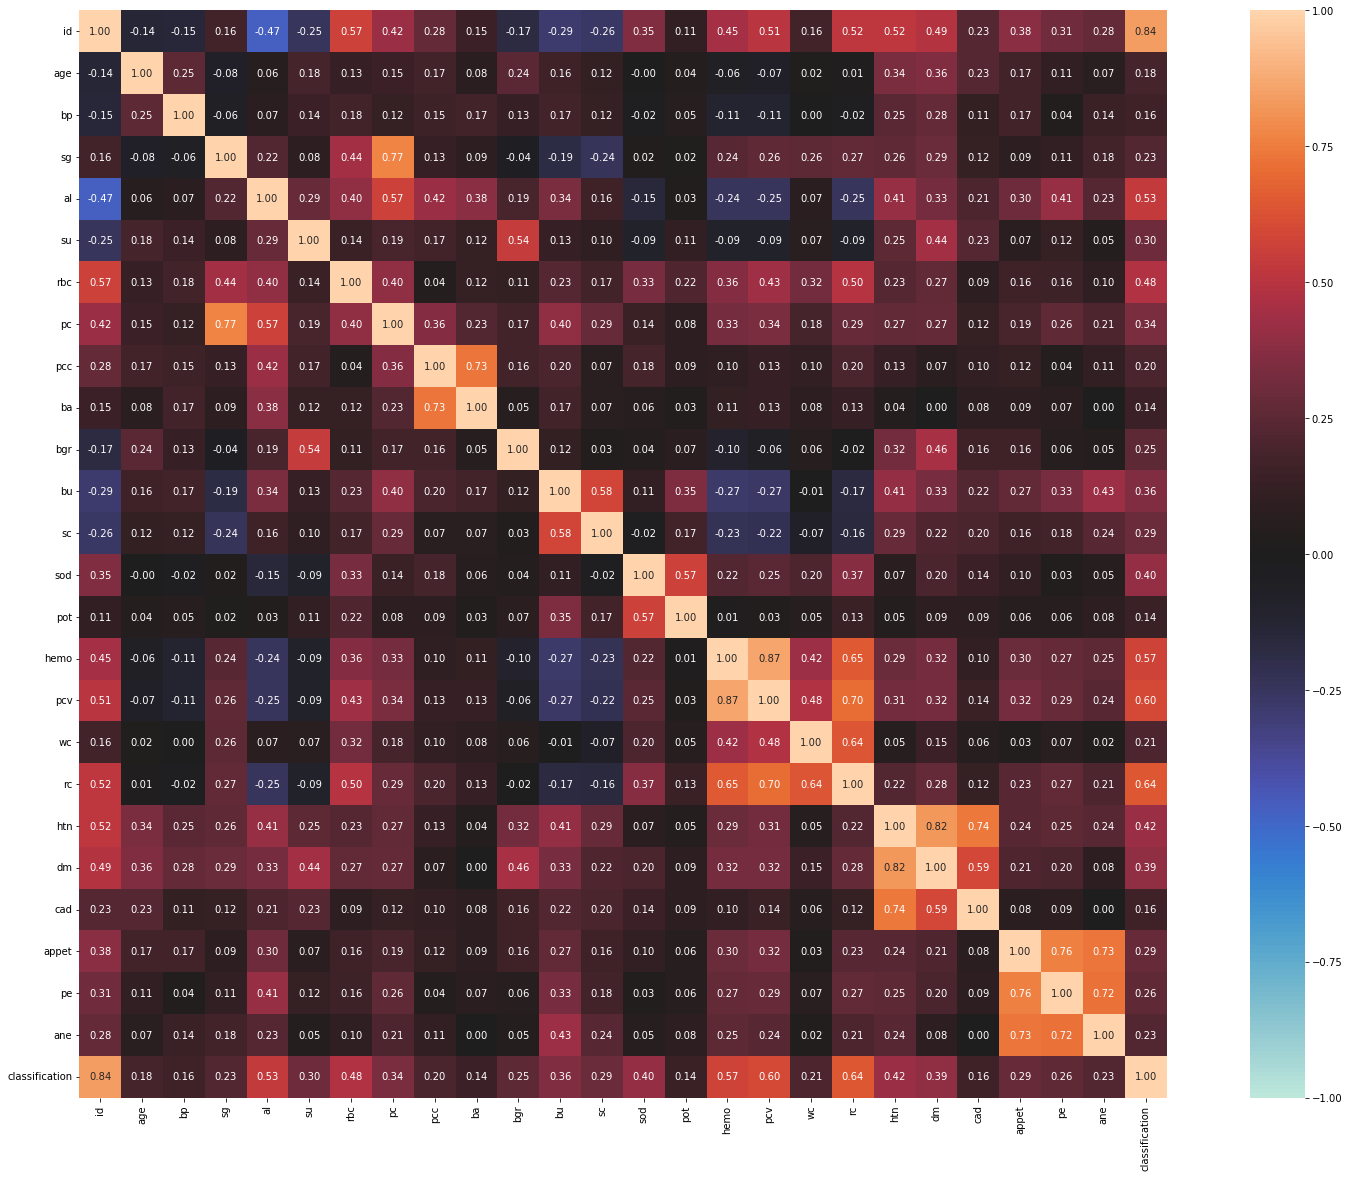

In [ ]:
complete_correlation= associations(df, filename= 'complete_correlation.png', figsize=(30,20))

## COMPLETE CORRELATION DATASET

In [ ]:
df_complete_corr=complete_correlation['corr']
df_complete_corr.dropna(axis=1, how='all').dropna(axis=0, how='all').style.background_gradient(cmap='nipy_spectral_r', axis=None).set_precision(2)

In [ ]:
df.corr().style.background_gradient(cmap="nipy_spectral_r")

In [ ]:
df=df.drop(["id"],axis=1)

In [ ]:
df=df.drop(["age"],axis=1)

In [ ]:
df=df.drop(["wc"],axis=1)

In [ ]:
df.columns

Index(['bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc',
       'sod', 'pot', 'hemo', 'pcv', 'rc', 'htn', 'dm', 'cad', 'appet', 'pe',
       'ane', 'classification'],
      dtype='object')

## DESCRIPTIVE STATISTICS

In [ ]:
df.describe()

bp          sg          al          su         bgr          bu  \
count  388.000000  353.000000  354.000000  351.000000  356.000000  381.000000   
mean    76.469072    1.017408    1.016949    0.450142  148.036517   57.425722   
std     13.683637    0.005717    1.352679    1.099191   79.281714   50.503006   
min     50.000000    1.005000    0.000000    0.000000   22.000000    1.500000   
25%     70.000000    1.010000    0.000000    0.000000   99.000000   27.000000   
50%     80.000000    1.020000    0.000000    0.000000  121.000000   42.000000   
75%     80.000000    1.020000    2.000000    0.000000  163.000000   66.000000   
max    180.000000    1.025000    5.000000    5.000000  490.000000  391.000000   

               sc         sod         pot        hemo         pcv          rc  
count  383.000000  313.000000  312.000000  348.000000  329.000000  269.000000  
mean     3.072454  137.528754    4.627244   12.526437   38.884498    4.707435  
std      5.741126   10.408752    3.193904    2.912587    8.990105    1.025323  
min      0.400000    4.500000    2.500000    3.100000    9.000000    2.100000  
25%      0.900000  135.000000    3.800000   10.300000   32.000000    3.900000  
50%      1.300000  138.000000    4.400000   12.650000   40.000000    4.800000  
75%      2.800000  142.000000    4.900000   15.000000   45.000000    5.400000  
max     76.000000  163.000000   47.000000   17.800000   54.000000    8.000000

## NULL VALUES

In [ ]:
missing_values=df.columns[df.isnull().any()]
df[missing_values].isnull().sum()

bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
rc       131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
dtype: int64

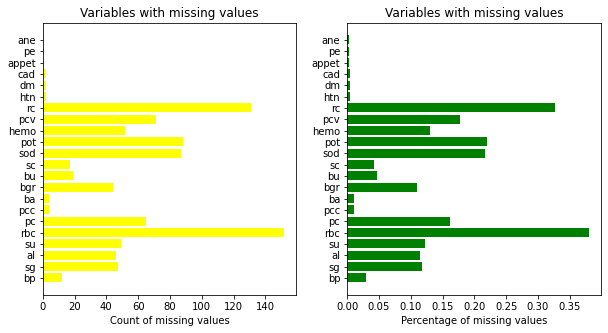

In [ ]:
labels = []
valuecount = []
percentcount = []
for col in missing_values:
    labels.append(col)
    valuecount.append(df[col].isnull().sum())
    percentcount.append(df[col].isnull().sum()/df.shape[0]) 
ind = np.arange(len(labels))
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,5))
rects = ax1.barh(ind, np.array(valuecount), color='yellow')
ax1.set_yticks(ind)
ax1.set_yticklabels(labels, rotation='horizontal')
ax1.set_xlabel("Count of missing values")
ax1.set_title("Variables with missing values");
rects = ax2.barh(ind, np.array(percentcount), color='green')
ax2.set_yticks(ind)
ax2.set_yticklabels(labels, rotation='horizontal')
ax2.set_xlabel("Percentage of missing values")
ax2.set_title("Variables with missing values");

In [ ]:
print("Total count of missing value in a dataset:",df.isnull().sum().sum() )


Total count of missing value in a dataset: 897


## HANDLING NULL VALUES

In [ ]:
df['bp'] = df['bp'].fillna(df['bp'].mean())
df["bp"].isnull().sum()

0

In [ ]:
df['sg'] = df['sg'].fillna(df['sg'].mean())
df["sg"].isnull().sum()

0

In [ ]:
df['al'] = df['al'].fillna(df['al'].mean())
df["al"].isnull().sum()

0

In [ ]:
df['su'] = df['su'].fillna(df['su'].mean())
df["su"].isnull().sum()

0

In [ ]:
df['rbc'] = df['rbc'].fillna("not mentioned")
df["rbc"].isnull().sum()

0

In [ ]:
df['pc'] = df['pc'].fillna(df['pc'].mode()[0])
df["pc"].isnull().sum()

0

In [ ]:
df = df.dropna(axis=0, subset=['pcc',"htn","appet"])


In [ ]:
df['bgr'] = df['al'].fillna(df['al'].mean())
df["bgr"].isnull().sum()

0

In [ ]:
df['bu'] = df['bu'].fillna(df['bu'].mean())
df["bu"].isnull().sum()

0

In [ ]:
df['sc'] = df['sc'].fillna(df['sc'].mean())
df['sod'] = df['sod'].fillna(df['sod'].mean())


In [ ]:
df['pot'] = df['pot'].fillna(df['pot'].mean())
df['pcv'] = df['pcv'].fillna(df['pcv'].mode()[0])
df['hemo'] = df['hemo'].fillna(df['hemo'].mean())


In [ ]:
df['rc'] = df['rc'].fillna("not mentioned")
df["rc"].isnull().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 399
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bp              393 non-null    float64
 1   sg              393 non-null    float64
 2   al              393 non-null    float64
 3   su              393 non-null    float64
 4   rbc             393 non-null    object 
 5   pc              393 non-null    object 
 6   pcc             393 non-null    object 
 7   ba              393 non-null    object 
 8   bgr             393 non-null    float64
 9   bu              393 non-null    float64
 10  sc              393 non-null    float64
 11  sod             393 non-null    float64
 12  pot             393 non-null    float64
 13  hemo            393 non-null    float64
 14  pcv             393 non-null    float64
 15  rc              393 non-null    object 
 16  htn             393 non-null    object 
 17  dm              393 non-null    obj

In [ ]:
df.isnull().sum()

bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

## HANDLING CATEGORICAL DATA

In [ ]:
for column in df:
     if (df[column].dtype=="object"):
        print("\n",column)
        print(df[column].value_counts(),"\n")
        


 rbc
normal           195
not mentioned    151
abnormal          47
Name: rbc, dtype: int64 


 pc
normal      317
abnormal     76
Name: pc, dtype: int64 


 pcc
notpresent    351
present        42
Name: pcc, dtype: int64 


 ba
notpresent    371
present        22
Name: ba, dtype: int64 


 rc
not mentioned    131
5.2               16
4.5               16
4.9               14
4.7               11
4.8               10
3.9               10
5.0               10
4.6                9
3.4                9
6.1                8
3.7                8
5.5                8
5.3                7
5.4                7
5.9                7
3.8                7
4.3                6
4.2                6
4.0                6
5.6                6
6.4                5
3.2                5
5.7                5
5.8                5
6.2                5
4.4                5
4.1                5
5.1                4
6.3                4
6.0                4
3.6                4
6.5                4
3.0        

In [ ]:
for column in df:
     if (df[column].dtype=="object"):        
        df.drop(df[(df[column] =="ckd\t") | (df[column] == "\tno") |(df[column] == " yes")| (df[column] == "\tyes") |(df[column] == "\t43")| (df[column]=="\t?")].index, inplace=True)


In [ ]:
for column in df:
     if (df[column].dtype=="object"):
        print("\n",column)
        print(df[column].value_counts(),"\n")


 rbc
normal           193
not mentioned    143
abnormal          47
Name: rbc, dtype: int64 


 pc
normal      310
abnormal     73
Name: pc, dtype: int64 


 pcc
notpresent    342
present        41
Name: pcc, dtype: int64 


 ba
notpresent    361
present        22
Name: ba, dtype: int64 


 rc
not mentioned    124
5.2               16
4.5               16
4.9               14
4.8               10
3.9               10
5.0               10
4.7               10
4.6                9
3.4                9
6.1                8
3.7                8
5.5                8
5.3                7
5.4                7
5.9                7
3.8                7
4.3                6
4.2                6
4.0                6
5.6                6
3.2                5
5.7                5
5.8                5
6.2                5
4.4                5
6.4                5
5.1                4
6.3                4
6.5                4
6.0                4
4.1                4
3.6                4
3.0        

## LABEL ENCODING

In [ ]:
objList = df.select_dtypes(include = "object").columns
print (objList)

Index(['rbc', 'pc', 'pcc', 'ba', 'rc', 'htn', 'dm', 'cad', 'appet', 'pe',
       'ane', 'classification'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    df[feat] = le.fit_transform(df[feat].astype(str))

print (df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383 entries, 0 to 399
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bp              383 non-null    float64
 1   sg              383 non-null    float64
 2   al              383 non-null    float64
 3   su              383 non-null    float64
 4   rbc             383 non-null    int32  
 5   pc              383 non-null    int32  
 6   pcc             383 non-null    int32  
 7   ba              383 non-null    int32  
 8   bgr             383 non-null    float64
 9   bu              383 non-null    float64
 10  sc              383 non-null    float64
 11  sod             383 non-null    float64
 12  pot             383 non-null    float64
 13  hemo            383 non-null    float64
 14  pcv             383 non-null    float64
 15  rc              383 non-null    int32  
 16  htn             383 non-null    int32  
 17  dm              383 non-null    int

In [ ]:
df.dtypes

bp                float64
sg                float64
al                float64
su                float64
rbc                 int32
pc                  int32
pcc                 int32
ba                  int32
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv               float64
rc                  int32
htn                 int32
dm                  int32
cad                 int32
appet               int32
pe                  int32
ane                 int32
classification      int32
dtype: object

In [ ]:
X = df.drop(['classification', 'sg',  'rc', 'pcv'], axis = 1)
y = df['classification']

In [ ]:
X.columns

Index(['id', 'age', 'bp', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'wc', 'htn', 'dm', 'cad', 'appet', 'pe',
       'ane'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
model = RandomForestClassifier(n_estimators = 20)
model.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score


In [ ]:
confusion_matrix(y_test, model.predict(X_test))


In [ ]:
print(f"Accuracy is {round(accuracy_score(y_test, model.predict(X_test))*100, 2)}%")


In [ ]:
import pickle
pickle.dump(model, open('kidney.pkl', 'wb'))

In [ ]:
from xgboost import XGBClassifier


In [ ]:
params={'learning-rate':[0,0.5,0.20,0.25],
        'max_depth':[5,8,10],
       'min_child_weight':[1,3,5,7],
       'gamma':[0.0,0.1,0.2,0.4],
       'colsample_bytree':[0.3,0.4,0.7]}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV


In [ ]:
classifier=XGBClassifier()


In [ ]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)


In [ ]:
random_search.fit(X_train,y_train)


Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=None,
                                           

In [ ]:
random_search.best_estimator_    #Checking for best model


XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning-rate=0.2, learning_rate=0.300000012, max_delta_step=0,
              max_depth=8, min_child_weight=3, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=0,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [ ]:
random_search.best_params_


{'min_child_weight': 3,
 'max_depth': 8,
 'learning-rate': 0.2,
 'gamma': 0.1,
 'colsample_bytree': 0.7}

In [ ]:
classifier=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='', learning_rate=0.300000012, max_delta_step=0,
              max_depth=5, min_child_weight=1,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [ ]:
classifier.fit(X_train,y_train)


[19:17:48] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.0.0\src\learner.cc:328: 
Parameters: { importance_type, missing, n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
y_pred=classifier.predict(X_test)


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score


In [ ]:
confusion_matrix(y_test,y_pred)


array([[54,  0],
       [ 0, 23]], dtype=int64)

In [ ]:
accuracy_score(y_test,y_pred)


1.0